In [2]:
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import soundscapy as sspy
from soundscapy.utils.parameters import LANGUAGE_ANGLES, PAQ_IDS

import optimize_target as ot
from MultiSkewNorm import MultiSkewNorm

warnings.filterwarnings("ignore")

/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/J2401_JASA_SSID-Single-Index/.venv/lib/python3.11/site-packages/rpy2/robjects/numpy2ri.py:252: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/J2401_JASA_SSID-Single-Index/.venv/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:368: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '


In [3]:
# Load latest ISD dataset
# data = sspy.isd.load_zenodo()
# Load latest ISD dataset
isd_file = Path("ISD v1.0 Data.csv")

data = pd.read_csv(isd_file, low_memory=False)
data, excl_data = sspy.isd.validate(data)
data = data.query("Language != 'cmn'")

# Exclude RegentsParkJapan outliers
# excl_id = list(data.query("LocationID == 'RegentsParkJapan'").query("ISOEventful > 0.72 | ISOEventful < -0.5").index)
# Excluded RegentsParkFields outliers
# excl_id = excl_id + list(data.query("LocationID == 'RegentsParkFields' and ISOPleasant < 0").index) # Helicopters
excl_id = [652, 706, 548, 550, 551, 553, 569, 580, 609, 618, 623, 636, 643]
data.drop(excl_id, inplace=True)
data

Renaming PAQ columns.
Checking PAQ data quality.
Identified 109 samples to remove.
[6, 9, 13, 30, 32, 46, 190, 213, 229, 244, 296, 412, 413, 428, 464, 485, 655, 734, 739, 762, 766, 780, 1067, 1274, 1290, 1316, 1320, 1338, 1346, 1347, 1397, 1425, 1431, 1446, 1447, 1470, 1485, 1491, 1504, 1505, 1510, 1512, 1517, 1522, 1523, 1527, 1599, 1698, 1734, 1817, 1911, 1948, 2069, 2107, 2109, 2111, 2150, 2199, 2277, 2293, 2384, 2386, 2490, 2523, 2584, 2592, 2695, 2762, 2767, 2783, 2789, 2825, 2826, 2832, 2840, 2856, 2859, 2879, 2883, 2889, 2910, 2932, 2956, 2969, 3031, 3058, 3077, 3124, 3149, 3163, 3185, 3202, 3210, 3211, 3212, 3213, 3214, 3215, 3216, 3272, 3302, 3365, 3414, 3491, 3502, 3510, 3517, 3533, 3583]


,LocationID,SessionID,GroupID,RecordID,start_time,end_time,latitude,longitude,Language,Survey_Version,...,RA_cp90,RA_cp95,THD_THD,THD_Min,THD_Max,THD_L5,THD_L10,THD_L50,THD_L90,THD_L95
0,CarloV,CarloV2,2CV12,1434,2019-05-16 18:46:00,2019-05-16 18:56:00,37.17685,-3.590392,eng,engISO2018,...,8.15,6.72,-0.09,-11.76,54.18,34.82,26.53,5.57,-9.00,-10.29
1,CarloV,CarloV2,2CV12,1435,2019-05-16 18:46:00,2019-05-16 18:56:00,37.17685,-3.590392,eng,engISO2018,...,8.15,6.72,-0.09,-11.76,54.18,34.82,26.53,5.57,-9.00,-10.29
2,CarloV,CarloV2,2CV13,1430,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,5.00,3.91,-2.10,-19.32,72.52,32.33,24.52,0.25,-16.30,-17.33
3,CarloV,CarloV2,2CV13,1431,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,5.00,3.91,-2.10,-19.32,72.52,32.33,24.52,0.25,-16.30,-17.33
4,CarloV,CarloV2,2CV13,1432,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,5.00,3.91,-2.10,-19.32,72.52,32.33,24.52,0.25,-16.30,-17.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,Noorderplantsoen,Noorderplantsoen1,NP161,61,2020-03-11 12:42:00,2020-03-11 12:55:00,NaN,NaN,nld,nldSSIDv1,...,2.54,2.00,-3.17,-11.97,59.64,37.87,26.54,6.33,-9.79,-10.34
1694,Noorderplantsoen,Noorderplantsoen1,NP162,63,2020-03-11 12:39:00,2020-03-11 13:00:00,NaN,NaN,nld,nldSSIDv1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1695,Noorderplantsoen,Noorderplantsoen1,NP162,62,2020-03-11 12:54:00,2020-03-11 12:58:00,NaN,NaN,nld,nldSSIDv1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1696,Noorderplantsoen,Noorderplantsoen1,NP162,64,2020-03-11 12:56:00,2020-03-11 12:59:00,NaN,NaN,nld,nldSSIDv1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for i, row in data.iterrows():
    lang = row["Language"]
    angles = LANGUAGE_ANGLES[lang]
    iso_pl, iso_ev = (
        sspy.surveys.adj_iso_pl(row[PAQ_IDS], angles, scale=4),
        sspy.surveys.adj_iso_ev(row[PAQ_IDS], angles, scale=4),
    )
    data.loc[i, "ISOPleasant"] = iso_pl
    data.loc[i, "ISOEventful"] = iso_ev

## Grid Search Target Optimization

In [5]:
quality = pd.DataFrame(
    data.groupby("LocationID")["sss01"].mean().sort_values(ascending=False)
)
quality["Rank"] = range(1, len(quality) + 1)
quality

,sss01,Rank
LocationID,,
RegentsParkJapan,4.617978,1
RegentsParkFields,4.467290,2
CampoPrincipe,4.345455,3
CarloV,4.344828,4
PlazaBibRambla,4.333333,5
MonumentoGaribaldi,4.156250,6
RussellSq,4.020690,7
MiradorSanNicolas,3.964286,8
TateModern,3.827815,9


In [7]:
tgt = MultiSkewNorm()
tgt.define_dp(
    np.array([0.5, 0.7]),
    np.array([[0.1, 0.05], [0.05, 0.1]]),
    np.array([0, -5]),
)
tgt.sample()
r, wspi, spi_ranks, target = ot.target_success(tgt, quality["Rank"], data)
print(f"Target: {target}")


In [16]:
omega_grid = ot.construct_omega_grid(
    variance_range=(0, 0.5),
    variance_n=10,
    covariance_range=(-1, 1),
    covariance_n=10,
)

targets = ot.construct_target_grid(
    omega_grid,
    xi_range=(-1, 1),
    xi_n=2,
    alpha_range=(-1, 1),
    alpha_n=2,
    sample_n=100,
)

print(len(targets))

  0%|          | 0/2992 [00:00<?, ?it/s]

2992


  0%|          | 0/2992 [00:00<?, ?it/s]

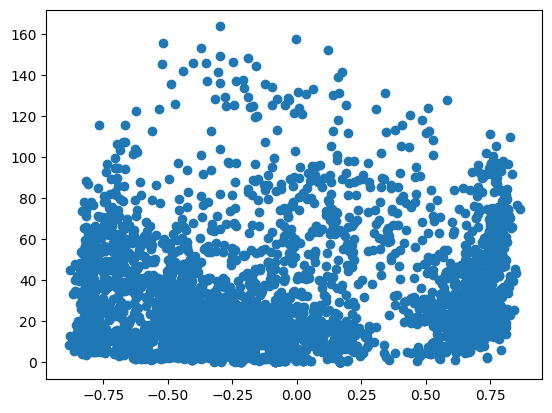

In [18]:
r_res, wspi_res, targets_res = ot.run_grid(
    targets, quality.sort_index()["Rank"], data, "LocationID"
)
plt.plot(r_res, wspi_res, "o")

0.826625386996904
109.62252600340837
Fitted from direct parameters.
Direct Parameters:
xi:    [ 1. -1.]
omega: [[ 0.111 -0.111]
 [-0.111  0.5  ]]
alpha: [-1.  1.]


None
None


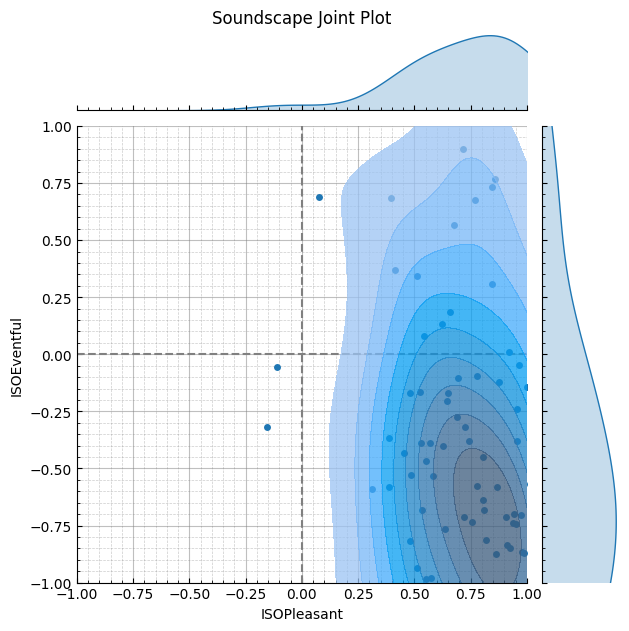

In [20]:
comb_res = [r_res[i] * wspi_res[i] for i in range(len(r_res))]
best_target = targets[np.argmax(comb_res)]
print(r_res[np.argmax(comb_res)])
print(wspi_res[np.argmax(comb_res)])

print(best_target.summary())
best_target.sspy_plot()

<Axes: title={'center': 'CarloV\nSPI = 40'}, xlabel='ISOPleasant', ylabel='ISOEventful'>

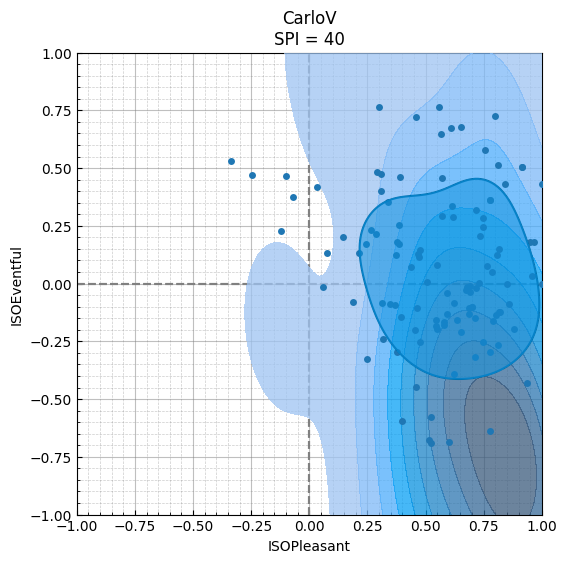

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))

sspy.plotting.density(
    x=best_target.sample_data[:, 0],
    y=best_target.sample_data[:, 1],
    ax=ax,
    incl_scatter=False,
    density_type="full",
    title="",
)

sspy.plotting.density(
    sspy.isd.select_location_ids(data, "CarloV"),
    ax=ax,
    density_type="simple",
    title=f"CarloV\nSPI = {best_target.spi(sspy.isd.select_location_ids(data, 'CarloV')[['ISOPleasant', 'ISOEventful']])}",
)

## `pymoo` Multi-objective Optimization